In [3]:
!nvidia-smi

Mon Sep 12 15:26:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.__version__

'1.21.6'

In [6]:
def fx(x, a, b):
    y = a * x + b
    return y

x = np.random.rand(100, 1) # random numbers from 0 to 1
y = fx(x, 2, 1) + np.random.randn(100, 1) * .1

In [7]:
x.shape, y.shape

((100, 1), (100, 1))

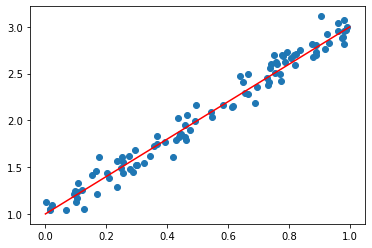

In [9]:
plt.scatter(x, y)
plt.plot([0, 1], [fx(0, 2, 1), fx(1, 2, 1)], 'r')
plt.show()

In [10]:
# initialize parameters "a" and "b" randomly
a = np.random.randn(1)
b = np.random.randn(1)
print(a, b)

[0.43367658] [0.30259851]


Mean Square Error Loss Fuction: 
$$L = \frac{1}{n}\sum \limits _{i=1} ^n[(y_i - (a x_i + b)) ^ 2]$$

**Gradient descent** optimization algorithm to find the minimum  
partial derivative of the loss function with respect to a  
$$\frac{dL}{da} = -\frac{2}{n} \sum \limits _{i=1} ^n[(y_i - (a x_i + b)) x_i]$$
Partial derivative of the loss function with respect to b  
$$\frac{dL}{db} = -\frac{2}{n} \sum \limits _{i=1} ^n[(y_i - (a x_i + b)) 1]$$

$$a = a - lr \frac{dL}{da}$$
$$b = b - lr \frac{dL}{db}$$

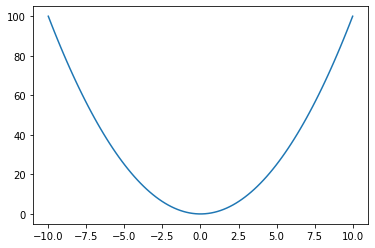

In [11]:
xx = np.linspace(-10, 10, 100)
yy = xx ** 2
plt.plot(xx, yy)
plt.show()

[1.79890706] [1.12613498]


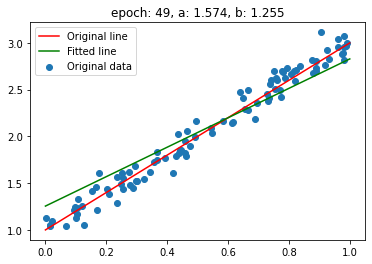

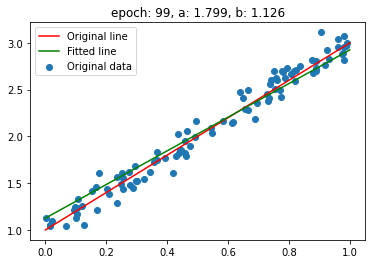

In [12]:
# set learning rate
lr = 0.1
# define number of epochs
n_epochs = 100
# build a disctionary to save the loss
history = {}
history['loss'] = []

for epoch in range(n_epochs):
    # compute predicted output
    y_hat = a * x + b
    # calculate the error
    error = y - y_hat
    # Mean Squared Error (MSE)
    loss = (error ** 2).mean()
    history['loss'].append(loss)
    
    # compute gradients for both "a" and "b"
    a_grad = -2 * (x * error).mean()
    b_grad = -2 * error.mean()
    # update "a" and "b" using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    if (epoch+1) % 50 == 0:
        plt.figure()
        plt.scatter(x, y, label='Original data')
        plt.plot([0, 1], [fx(0, 2, 1), fx(1, 2, 1)], 'r', label='Original line')
        plt.plot([0, 1], [fx(0, a, b), fx(1, a, b)], 'g', label='Fitted line')
        plt.legend()
        plt.title('epoch: %d, a: %.3f, b: %.3f'%(epoch, a, b))
        
print(a, b)

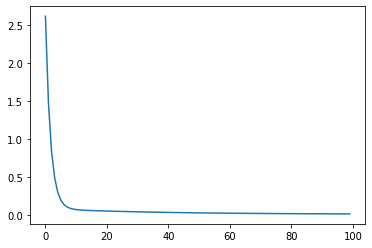

In [13]:
plt.plot(history['loss'])
plt.show()

# PyTorch - 1

In [14]:
import torch

In [15]:
torch.__version__

'1.12.1+cu113'

In [16]:
# make sure you are using GPU, or you can go to Edit - Notebook settings to select under the Hardware accelerator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [17]:
def fx(x, a, b):
    y = a * x + b
    return y

# x = np.random.rand(100, 1) # random numbers from 0 to 1
# y = fx(x, 2, 1) + np.random.randn(100, 1) * .1

x = torch.rand(100, 1) # random numbers from 0 to 1
y = fx(x, 2, 1) + torch.randn(100, 1) * .1

In [18]:
x.flatten(), y.flatten()

(tensor([0.6858, 0.8211, 0.8158, 0.9709, 0.9580, 0.6847, 0.0548, 0.2974, 0.0773,
         0.1629, 0.7314, 0.8054, 0.4498, 0.2154, 0.9197, 0.8082, 0.6266, 0.5724,
         0.3941, 0.0227, 0.7538, 0.2011, 0.9230, 0.0077, 0.9774, 0.0734, 0.5818,
         0.4898, 0.6533, 0.2569, 0.2064, 0.6471, 0.3130, 0.9802, 0.4057, 0.5775,
         0.4079, 0.9073, 0.1067, 0.3798, 0.7709, 0.7575, 0.3345, 0.4207, 0.6057,
         0.1298, 0.6251, 0.4462, 0.3220, 0.1130, 0.7881, 0.7814, 0.7275, 0.6420,
         0.6710, 0.0013, 0.8113, 0.3943, 0.6145, 0.6761, 0.1355, 0.2970, 0.8806,
         0.4911, 0.6057, 0.8997, 0.3108, 0.6324, 0.3263, 0.8618, 0.7950, 0.1982,
         0.9579, 0.7874, 0.1512, 0.7105, 0.0538, 0.1286, 0.6460, 0.3622, 0.6618,
         0.3689, 0.0452, 0.0879, 0.0823, 0.4894, 0.7507, 0.1131, 0.7741, 0.9327,
         0.5259, 0.2495, 0.8583, 0.6277, 0.3934, 0.6517, 0.3961, 0.1781, 0.3543,
         0.4124]),
 tensor([2.3768, 2.7364, 2.6939, 2.9147, 2.8609, 2.2546, 1.1046, 1.5657, 1.0393,
         

In [19]:
# load the data to GPU in two ways
x = x.to(device)
y = y.cuda()

In [20]:
x.flatten(), y.flatten()

(tensor([0.6858, 0.8211, 0.8158, 0.9709, 0.9580, 0.6847, 0.0548, 0.2974, 0.0773,
         0.1629, 0.7314, 0.8054, 0.4498, 0.2154, 0.9197, 0.8082, 0.6266, 0.5724,
         0.3941, 0.0227, 0.7538, 0.2011, 0.9230, 0.0077, 0.9774, 0.0734, 0.5818,
         0.4898, 0.6533, 0.2569, 0.2064, 0.6471, 0.3130, 0.9802, 0.4057, 0.5775,
         0.4079, 0.9073, 0.1067, 0.3798, 0.7709, 0.7575, 0.3345, 0.4207, 0.6057,
         0.1298, 0.6251, 0.4462, 0.3220, 0.1130, 0.7881, 0.7814, 0.7275, 0.6420,
         0.6710, 0.0013, 0.8113, 0.3943, 0.6145, 0.6761, 0.1355, 0.2970, 0.8806,
         0.4911, 0.6057, 0.8997, 0.3108, 0.6324, 0.3263, 0.8618, 0.7950, 0.1982,
         0.9579, 0.7874, 0.1512, 0.7105, 0.0538, 0.1286, 0.6460, 0.3622, 0.6618,
         0.3689, 0.0452, 0.0879, 0.0823, 0.4894, 0.7507, 0.1131, 0.7741, 0.9327,
         0.5259, 0.2495, 0.8583, 0.6277, 0.3934, 0.6517, 0.3961, 0.1781, 0.3543,
         0.4124], device='cuda:0'),
 tensor([2.3768, 2.7364, 2.6939, 2.9147, 2.8609, 2.2546, 1.1046, 1.5657, 

In [21]:
# initialize parameters "a" and "b" randomly
# a = np.random.randn(1)
# b = np.random.randn(1)

a = torch.randn(1).cuda()
b = torch.randn(1).cuda()
print(a, b)

tensor([-0.0549], device='cuda:0') tensor([2.0766], device='cuda:0')


tensor([1.4149], device='cuda:0') tensor([1.3074], device='cuda:0')


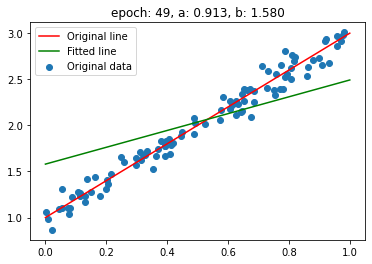

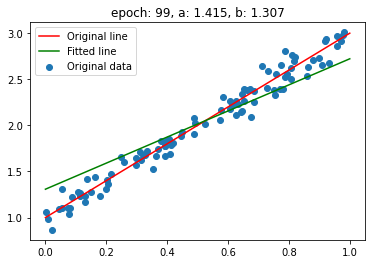

In [22]:
# set learning rate
lr = 0.1
# define number of epochs
n_epochs = 100
# build a disctionary to save the loss
history = {}
history['loss'] = []

for epoch in range(n_epochs):
    # compute predicted output
    y_hat = a * x + b
    # calculate the error
    error = y - y_hat
    # Mean Squared Error (MSE)
    loss = (error ** 2).mean()
    history['loss'].append(loss.cpu())
    
    # compute gradients for both "a" and "b"
    a_grad = -2 * (x * error).mean()
    b_grad = -2 * error.mean()
    # update "a" and "b" using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    if (epoch+1) % 50 == 0:
        plt.figure()
        plt.scatter(x.cpu().numpy(), y.cpu().numpy(), label='Original data')
        plt.plot([0, 1], [fx(0, 2, 1), fx(1, 2, 1)], 'r', label='Original line')
        plt.plot([0, 1], [fx(0, a.cpu().numpy(), b.cpu().numpy()), 
                          fx(1, a.cpu().numpy(), b.cpu().numpy())], 'g', label='Fitted line')
        plt.legend()
        plt.title('epoch: %d, a: %.3f, b: %.3f'%(epoch, a, b))
        
print(a, b)

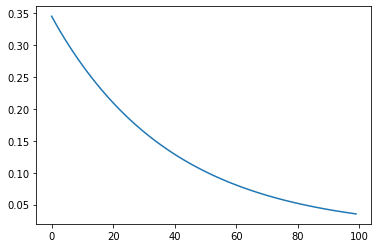

In [23]:
plt.plot(history['loss'])
plt.show()

# PyTorch - 2

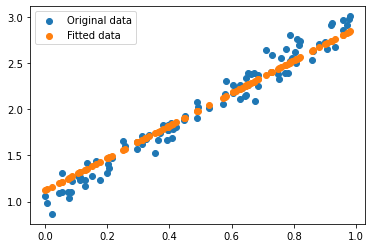

tensor([[1.7652]], device='cuda:0')
tensor([1.1175], device='cuda:0')


In [24]:
import torch
import torch.nn as nn

# set learning rate
lr = 0.1
# define number of epochs
n_epochs = 100

# linear model
model = nn.Linear(1, 1).to(device)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)  

# Train the model
for epoch in range(n_epochs):
    # forward
    y_hat = model(x)
    loss = criterion(y_hat, y)
    
    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the graph
y_pred = model(x).cpu()
plt.scatter(x.cpu().numpy(), y.cpu().numpy(), label='Original data')
plt.scatter(x.cpu().numpy(), y_pred.detach().numpy(), label='Fitted data')
plt.legend()
plt.show()

for param in model.parameters():
    print(param.data)